In [1]:
import os
import sys
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.gridspec as gridspec
%matplotlib inline
sys.path.insert(1, r'C:\Users\maolivei\neuro_sean\NeuroChaT')
%load_ext autoreload
%autoreload 2

# Load Axona Classes

In [2]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp

In [3]:
spike = NSpike(system="Axona")
spike.set_name("CO")
spat = NSpatial(system="Axona")
spat.set_name("S0")

data_dir = r"C:\Users\maolivei\Documents\post_doc\data\LCA1"
spike_name = r"040319C_LCA1_open-arena_15min.1"
pos_name = r"040319C_LCA1_open-arena_15min_1.txt"
#eeg_name = r'LCA1-linear sleep1 260219.egf' 
spike.set_filename(os.path.join(data_dir, spike_name))
spat.set_filename(os.path.join(data_dir, pos_name))
#NLfp.set_filename(os.path.join(data_dir, eeg_name))

In [4]:
spike.load()
spat.load()

plt.figure(figsize=(20,40), facecolor='white')
for unit in spike.get_unit_list():
    spike.set_unit_no(unit)
    ndata = NData()
    ndata.spike = spike
    ndata.spatial = spat
    graphData= ndata.wave_property() 
    fig = nc_plot.wave_property(graphData, [int (spike.get_total_channels()/2), 2])
    plt.savefig('wave_'+ str(unit))
    pixel_size = 5
    placeData = ndata.place(pixel=pixel_size, filter=['b', 5], range=[0, spat.get_duration()], chop_bound=0)
    fig = nc_plot.loc_firing(placeData)
    plt.savefig('firing_'+ str(unit))
    graphData= ndata.isi_corr(bins = 1, bound = [-10, 10]) 
    fig = nc_plot.isi_corr(graphData)
    plt.savefig('isis_'+ str(unit))
    
    


[autoreload of neurochat.nc_plot failed: Traceback (most recent call last):
  File "C:\Users\maolivei\AppData\Local\conda\conda\envs\Neurochat\lib\site-packages\IPython\extensions\autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\maolivei\AppData\Local\conda\conda\envs\Neurochat\lib\site-packages\IPython\extensions\autoreload.py", line 376, in superreload
    module = reload(module)
  File "C:\Users\maolivei\AppData\Local\conda\conda\envs\Neurochat\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\maolivei\AppData\Local\conda\conda\envs\Neurochat\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code


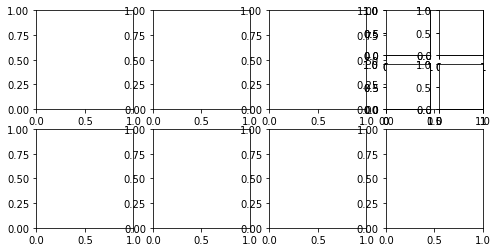

In [47]:
nc_plot.plot_cells(2)